In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read RegData csv file into numpy array

In [2]:
regData = np.loadtxt("./resources/RegData.csv", delimiter = ",")

### Explore the data

In [3]:
regData

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

### Define variables X and y. Assign first column data to X and second column to y
##### Note: X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = regData[:,0]
y = regData[:,1]

### Explore your data 

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

### Plot the original data (scatter plot of X,y)

Text(0, 0.5, 'y')

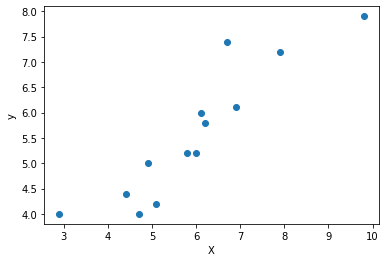

In [7]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

# LR Full Implementation

In [8]:
def batch_GD(x,y,alpha):
    #1. Initialize parameters (theta_0 & theta_1) with zero.
    theta_0 = 0
    theta_1 = 0
    
    thetas_0 = []
    thetas_1 = []
    js = []
    
    #7. Repeat from 2 to 6 until converge to the minimum or achieve maximum iterations.
    for i in range(1000):
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
        hx = theta_0 + (theta_1 * x)

        #3. Calculate Cost function 𝑱(theta_0,theta_1 )
        j = (np.sum(hx - y)**2)/(2*len(x))

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        js.append(j)

        #4. Calculate the gradient
        g_theta_0 = np.sum(hx-y)/len(x)
        g_theta_1 = np.sum((hx-y) * x)/len(x)

        #5. Update the parameters (simultaneously)
        theta_0 = theta_0 - (alpha * g_theta_0)
        theta_1 = theta_1 - (alpha * g_theta_1)

        #7. Stop condition
        thetas_vactor_prev = np.array([thetas_0[-1], thetas_1[-1]])
        thetas_vector_curr = np.array([theta_0, theta_1])
        if i>1 and (js[i-1] - js[i]) < 0.0001 and (np.linalg.norm(thetas_vactor_prev) - np.linalg.norm(thetas_vector_curr)) < 0.0001:
            break;
        
    return i, thetas_0, thetas_1, js

In [9]:
i, thetas_0, thetas_1, js = batch_GD(X,y,0.001)

In [10]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 200 times
and the min cost is 0.053236943552192134


### Plot LR equation output (fitted line) with the original data (scatter plot of X,y)

In [11]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 200 iterations')

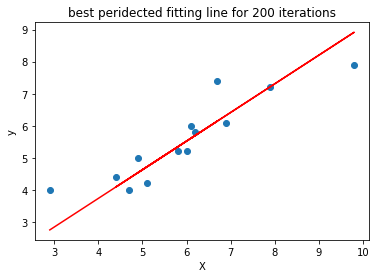

In [12]:
plt.scatter(X,y)
plt.plot(X, yhat, color ='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

### Plot the cost function 

Text(0.5, 1.0, 'Epochs vs Cost function')

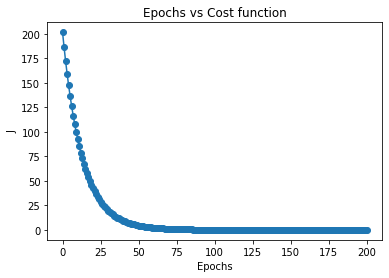

In [13]:
plt.plot(np.arange(i+1), js,'-o')
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

### Plot thetas with cost function

Text(0.5, 1.0, 'theta 0 vs cost function')

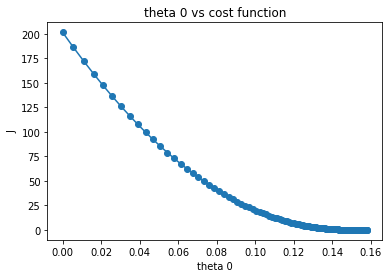

In [14]:
# theta 0
plt.plot(thetas_0,js,'-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

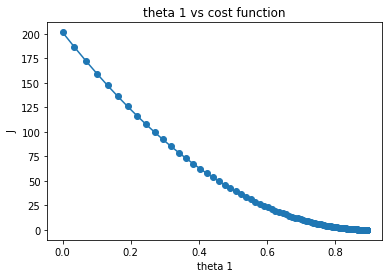

In [15]:
# theta 1
plt.plot(thetas_1,js,'-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

### Use R2 score to evaluate LR equation output

In [16]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 74%


## GD vectorize Implementation

In [17]:
def batch_GD_vectorized(x,y,alpha):
    #1. Initialize parameters (theta_0 & theta_1) with zero.
    theta_0 = 0
    theta_1 = 0
    
    thetas_0 = []
    thetas_1 = []
    js = []
    
    #7. Repeat from 2 to 6 until converge to the minimum or achieve maximum iterations.
    for i in range(1000):
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
        hx = theta_0 + (theta_1 * x)

        #3. Calculate Cost function 𝑱(theta_0,theta_1 )
        j = (np.dot(hx - y, hx - y ))/(2*len(x))

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        js.append(j)

        #4. Calculate the gradient
        g_theta_0 = np.sum(hx-y)/len(x)
        g_theta_1 = np.dot((hx-y) , x)/len(x)

        #5. Update the parameters (simultaneously)
        theta_0 = theta_0 - (alpha * g_theta_0)
        theta_1 = theta_1 - (alpha * g_theta_1)

        #7. Stop condition
        thetas_vactor_prev = np.array([thetas_0[-1], thetas_1[-1]])
        thetas_vector_curr = np.array([theta_0, theta_1])
        if i>1 and (js[i-1] - js[i]) < 0.0001 and (np.linalg.norm(thetas_vactor_prev) - np.linalg.norm(thetas_vector_curr)) < 0.0001:
            break;
        
    return i, thetas_0, thetas_1, js

In [18]:
i, thetas_0, thetas_1, js = batch_GD_vectorized(X,y,0.001)

In [19]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 121 times
and the min cost is 0.20204981976281938


In [20]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 121 iterations')

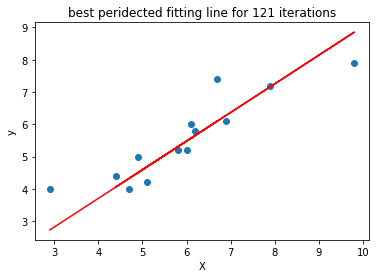

In [21]:
plt.scatter(X,y)
plt.plot(X, yhat,color = 'red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Epochs vs Cost function')

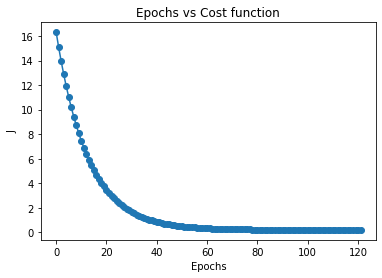

In [22]:
plt.plot(np.arange(i+1), js,'-o')
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

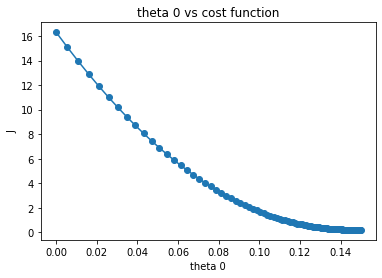

In [23]:
# theta 0
plt.plot(thetas_0,js,'-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

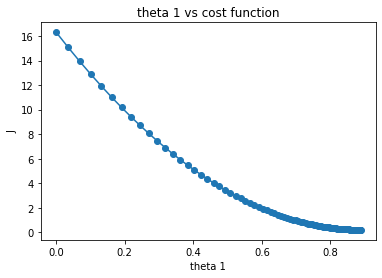

In [24]:
# theta 1
plt.plot(thetas_1,js,'-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [25]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 74%


### Apply GD on generated data

In [26]:
# using linspace(start, stop, num) to generate the values in X equally distributed between 0 and 20
# num is 50 (default)
X = np.linspace(0, 20)
y = -2*X + 1 

In [27]:
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [28]:
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

#### with batch_GD()

In [66]:
i, thetas_0, thetas_1, js = batch_GD(X,y,0.001)

In [67]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 30 times
and the min cost is 0.05140479386145589


In [68]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 30 iterations')

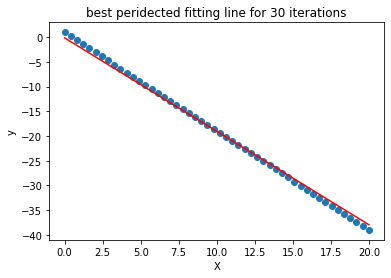

In [69]:
plt.scatter(X,y)
plt.plot(X, yhat,color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Epochs vs Cost function')

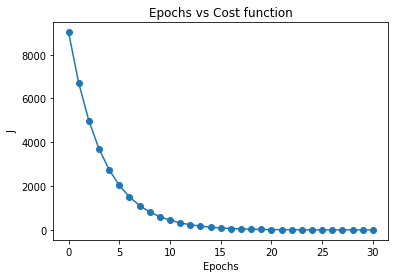

In [70]:
plt.plot(np.arange(i+1), js,'-o')
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

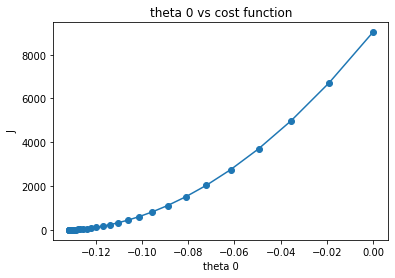

In [72]:
# theta 0
plt.plot(thetas_0,js,'-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

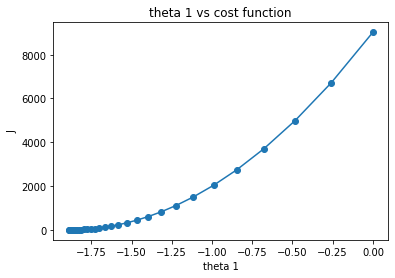

In [73]:
# theta 1
plt.plot(thetas_1,js, '-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [74]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 99%


#### with batch_GD_vectorized()

In [116]:
i, thetas_0, thetas_1, js = batch_GD_vectorized(X,y,0.001)

In [117]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 54 times
and the min cost is 0.16354374311931646


In [118]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 54 iterations')

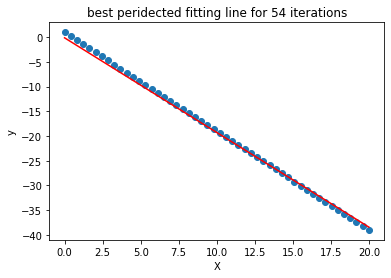

In [119]:
plt.scatter(X,y)
plt.plot(X, yhat, color = 'red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Epochs vs Cost function')

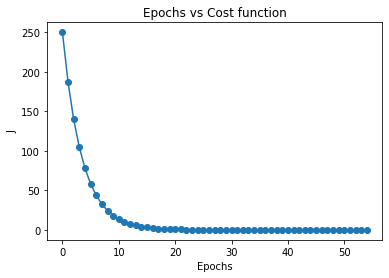

In [120]:
plt.plot(np.arange(i+1), js, '-o')
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

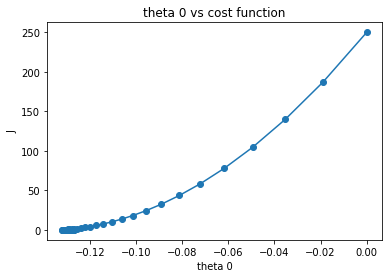

In [121]:
# theta 0
plt.plot(thetas_0,js, '-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

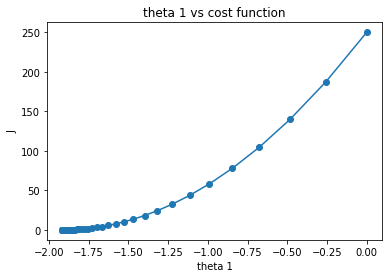

In [122]:
# theta 1
plt.plot(thetas_1,js,'-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [123]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 99%
